# **<font style="color:blue">Project 4: Kaggle Competition - Semantic Segmentation</font>**

<div>
    <table>
        <tr><td><h3>Sr. no.</h3></td> <td><h3>Section</h3></td> <td><h3>Points</h3></td> </tr>
        <tr><td><h3>1</h3></td> <td><h3>1.1. Dataset Class</h3></td> <td><h3>7</h3></td> </tr>
        <tr><td><h3>2</h3></td> <td><h3>1.2. Visualize dataset</h3></td> <td><h3>3</h3></td> </tr>
        <tr><td><h3>3</h3></td> <td><h3>2. Evaluation Metrics</h3></td> <td><h3>10</h3></td> </tr>
        <tr><td><h3>4</h3></td> <td><h3>3. Model</h3></td> <td><h3>10</h3></td> </tr>
        <tr><td><h3>5</h3></td> <td><h3>4.1. Train</h3></td> <td><h3>7</h3></td> </tr>
        <tr><td><h3>6</h3></td> <td><h3>4.2. Inference</h3></td> <td><h3>3</h3></td> </tr>
        <tr><td><h3>7</h3></td> <td><h3>5. Prepare Submission CSV</h3></td><td><h3>10</h3></td> </tr>
        <tr><td><h3>8</h3></td> <td><h3>6. Kaggle Profile Link</h3></td> <td><h3>50</h3></td> </tr>
    </table>
</div>

---

**In this project, you have participated in the Kaggle competition, and also submit the notebook and othe code in the course lab.**

**This Kaggle competition is a semantic segmentation challenge.**

<h2>Dataset Description </h2>
<p>The dataset consists of 3,269 images in 12 classes (including background). All images were taken from drones in a variety of scales. Samples are shown below:
<img src="https://github.com/ishann/aeroscapes/blob/master/assets/data_montage.png?raw=true" width="800" height="800">
<p>The data was splitted into public train set and private test set which is used for evaluation of submissions. You can split public subset into train and validation sets yourself.
Images are named with a unique <code>ImageId</code>. </p>
<p> You should segment and classify the images in the test set.</p>
<p>The dataset consists of landscape images taken from drones in a variety of scales.</p>

**The notebook is divided into sections. You have to write code, as mention in the section.  For other helper functions, you can write `.py` files and import them in the notebook. You have to submit the notebook along with `.py` files. Your submitted code must be runnable without any bug.**

# **<font style="color:green">1. Add and Import libraries</font>**

In [1]:
!pip uninstall -y tensorflow
print("Optuna install...")
!pip install -qq -U optuna
print("Optuna-dashboard install...")
!pip install -qq -U optuna-dashboard
print("Struclog install...")
!pip install -qq -U structlog
#print("Onnx install...")
#!pip install -qq onnx 
print("Onnxruntime install...")
!pip install -qq onnxruntime
print("Tensorboard install...")
!pip install -qq tensorboard

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Optuna install...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 7.2 MB/s eta 0:00:00:00:01
Optuna-dashboard install...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 57.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.8/103.8 kB 5.4 MB/s eta 0:00:00
Struclog install...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 kB 1.9 MB/s eta 0:00:00
Onnxruntime install...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 82.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.5 MB/s eta 0:00:00
Tensorboard install...


In [2]:
print(100 * "-")
%pip show optuna
print(100 * "-")
%pip show optuna-dashboard
print(100 * "-")
%pip show structlog
print(100 * "-")
%pip show onnx
print(100 * "-")
%pip show onnxruntime
print(100 * "-")
%pip show torch
print(100 * "-")
%pip show tensorboard
print(100 * "-")

----------------------------------------------------------------------------------------------------
Name: optuna
Version: 4.5.0
Summary: A hyperparameter optimization framework
Home-page: https://optuna.org/
Author: Takuya Akiba
Author-email: 
License: 
Location: /usr/local/lib/python3.11/dist-packages
Requires: alembic, colorlog, numpy, packaging, PyYAML, sqlalchemy, tqdm
Required-by: optuna-dashboard
Note: you may need to restart the kernel to use updated packages.
----------------------------------------------------------------------------------------------------
Name: optuna-dashboard
Version: 0.19.0
Summary: Real-time dashboard for Optuna
Home-page: https://github.com/optuna/optuna-dashboard
Author: 
Author-email: Masashi Shibata <mshibata@preferred.jp>
License: MIT License
Location: /usr/local/lib/python3.11/dist-packages
Requires: bottle, optuna, packaging, scikit-learn
Required-by: 
Note: you may need to restart the kernel to use updated packages.
-----------------------------

In [3]:
import os
import json
import sys
import shutil
import random
import time
import datetime
import warnings
import math
import zipfile
import threading
import cv2

import logging
import structlog

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import polars as pl

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms

from torch.utils.data import Dataset, DataLoader, random_split
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter

from PIL import Image, ImageDraw, ImageFont, ImageEnhance, ImageFilter

from sklearn.metrics import jaccard_score

import optuna
from optuna.trial import Trial
from optuna import visualization 
from optuna_dashboard import run_server

import onnx
import onnxruntime as ort

from tqdm import tqdm

# **<font style="color:green">2. Data Exploration</font>**

## ***<font style="color:purple">2.1. Base Functions</font>***

In [4]:
def copy_and_zip_folder(source_folder, destination_folder, zip_filename):
    """Copies a folder to a new location and then packs it into a ZIP file.

    Args:
        source_folder (_type_): Path to the source folder you want to copy.
        destination_folder (_type_): Path to the destination folder where the contents should be copied.
        zip_filename (_type_): Name of the ZIP file (e.g. 'archiv.zip').
    """  
    try:
        # Copying an entire folder to a new location
        shutil.copytree(source_folder, destination_folder)
        print(f"The folder '{source_folder}' was successfully copied to '{destination_folder}'.")

        # Create a ZIP archive from the copied folder
        # A ZIP file named 'archiv.zip' will be created at the same level as the copied folder
        zip_path = os.path.join(os.path.dirname(destination_folder), zip_filename)
        with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
            for root, dirs, files in os.walk(destination_folder):
                for file in files:
                    file_path = os.path.join(root, file)
                    # Create a relative path so that there are no absolute paths in the ZIP
                    relative_path = os.path.relpath(file_path, os.path.dirname(destination_folder))
                    zipf.write(file_path, relative_path)
        
        print(f"The folder '{destination_folder}' was successfully packed into '{zip_path}'.")

    except FileExistsError:
        print(f"Error: Destination folder '{destination_folder}' already exists. Please delete it or change the path.")
    except Exception as e:
        print(f"An error occurred: {e}")


```python
source = "<input_path>"
destination = "<output_path>"
zip_file = "<name_file>.zip"

copy_and_zip_folder(source, destination, zip_file)
```

## ***<font style="color:purple">2.2. Dataset Class</font>***

### *<font style="color:brown">2.2.1 Global settings for dataset</font>*


In [5]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
NUM_CLASSES = 12  # Background included
DATA_PATH = os.path.join('/kaggle','input','opencv-pytorch-segmentation-project-round2')
IMAGES_FOLDER = os.path.join('imgs','imgs')
MASKS_FOLDER = os.path.join('masks','masks')
CSV_PATH_TRAIN = 'train.csv'  
CSV_PATH_TEST = 'test.csv'

### *<font style="color:brown">2.2.2 Class definition</font>*

In [6]:
class SemSegDataset(Dataset):
    """ Custom Dataset for Semantic Segmentation tasks.

    Args:
        Dataset (_type_): PyTorch Dataset class.
    """
    def __init__(self, data_path, images_folder, masks_folder, csv_file, train_val_test='train', transforms=None, id_column=None):
        """ Initialization of the dataset.

        Args:
            data_path (_type_): _path to the dataset_
            images_folder (_type_): _folder containing images_
            masks_folder (_type_): _folder containing masks_
            csv_file (_type_): _csv file with image metadata_
            train_val_test (str, optional): _train, val or test_. Defaults to 'train'.
            transforms (_type_, optional): _transformations to apply_. Defaults to None.
            id_column (_type_, optional): _column name for image IDs in the CSV_. Defaults to None.

        Raises:
            KeyError: _if no valid image ID column is found in the CSV_
        """
        self.data_path = data_path
        self.images_folder = images_folder
        self.masks_folder = masks_folder
        self.transforms = transforms
        self.df = pd.read_csv(os.path.join(data_path, csv_file))
        
        possible_id_columns = ['image_id', 'ImageId', 'ImageID', 'Image_Id', 'id', 'ImageId_ClassId']
        self.id_column = id_column
        if self.id_column is None:
            for col in possible_id_columns:
                if col in self.df.columns:
                    self.id_column = col
                    break
        if self.id_column is None:
            raise KeyError(f"None of the expected image ID columns {possible_id_columns} found in {csv_file}. Available columns: {list(self.df.columns)}")

        if self.id_column == 'ImageId_ClassId':
            self.image_ids = self.df['ImageId_ClassId'].str.split('_', expand=True)[0].unique()
        else:
            self.image_ids = self.df[self.id_column].unique()

    def __len__(self):
        """ Length of the dataset.

        Returns:
            _type_: _length of the dataset_
        """
        return len(self.image_ids)

    def __getitem__(self, idx):
        """ Get item from the dataset.

        Args:
            idx (_type_): _index of the item_

        Returns:
            _type_: _image and mask tensors_
        """
        img_id = self.image_ids[idx]
        img_id_str = f"{img_id}.jpg"
        img_path = os.path.join(self.data_path, self.images_folder, img_id_str)
        try:
            image = Image.open(img_path).convert('RGB')
        except FileNotFoundError:
            warnings.warn(f"Image not found: {img_path}. Using dummy image.")
            image = Image.new('RGB', (512, 512))

        mask_path = os.path.join(self.data_path, self.masks_folder, img_id_str.replace('.jpg', '.png'))
        try:
            mask = Image.open(mask_path)
            mask = np.array(mask, dtype=np.int64)
            mask = torch.tensor(mask, dtype=torch.long)
            print(f"Sample {idx} - Mask unique values: {torch.unique(mask)}")
        except FileNotFoundError:
            warnings.warn(f"Mask not found: {mask_path}. Dummy mask used.")
            mask = torch.zeros((512, 512), dtype=torch.long)
        
        if self.transforms:
            image = self.transforms(image)
            # Ensure mask is resized to match image dimensions
            mask = transforms.functional.resize(mask.unsqueeze(0), (512, 512), interpolation=transforms.InterpolationMode.NEAREST).squeeze(0)
            mask = mask.long()
        
        return image, mask

### *<font style="color:brown">2.2.3 Definition of transformation</font>*

In [7]:
train_transforms = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

### *<font style="color:brown">2.2.4 Dataset creation and split dataset</font>*

In [8]:
# Initialize datasets with id_column='ImageID' for both train and test
full_dataset = SemSegDataset(DATA_PATH, IMAGES_FOLDER, MASKS_FOLDER, CSV_PATH_TRAIN, transforms=train_transforms, id_column='ImageID')
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])
test_dataset = SemSegDataset(DATA_PATH, IMAGES_FOLDER, MASKS_FOLDER, CSV_PATH_TEST, train_val_test='test', transforms=train_transforms, id_column='ImageID')

## ***<font style="color:purple">2.3. Visualize dataset</font>***

### *<font style="color:brown">2.3.1 Function definition</font>*

In [9]:
def visualize_samples(dataset, num_samples=5):
    """ Visualize samples from the dataset.

    Args:
        dataset (_type_): _dataset to visualize samples from.
        num_samples (int, optional): _number of samples to visualize. Defaults to 5.
    """ 
    colors = [
        [0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1],
        [0, 1, 1], [1, 0.5, 0], [0.5, 0, 0.5], [0.5, 0.5, 0], [0.5, 0, 1], [0, 0.5, 0.5]
    ]

    fig, axes = plt.subplots(num_samples, 2, figsize=(10, num_samples * 5))
    for i in range(num_samples):
        img, mask = dataset[i]
        img = img.permute(1, 2, 0).numpy() * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img = np.clip(img, 0, 1)
        
        mask_np = mask.numpy().astype(np.uint8)
        h, w = mask_np.shape
        colored_mask = np.zeros((h, w, 3))
        for cls in range(NUM_CLASSES):
            colored_mask[mask_np == cls] = colors[cls]
        if mask_np.max() >= NUM_CLASSES:
            colored_mask[mask_np >= NUM_CLASSES] = [0.5, 0.5, 0.5]
        
        axes[i, 0].imshow(img)
        axes[i, 0].set_title(f"Image {i+1}")
        axes[i, 0].axis('off')
        axes[i, 1].imshow(colored_mask)
        axes[i, 1].set_title(f"Mask {i+1}")
        axes[i, 1].axis('off')
    plt.tight_layout()
    plt.show()

### *<font style="color:brown">2.3.2 Show data</font>*

Sample 1433 - Mask unique values: tensor([ 0,  1,  7,  9, 10])
Sample 1869 - Mask unique values: tensor([ 0,  1,  2,  3,  7,  8,  9, 10])
Sample 342 - Mask unique values: tensor([ 0,  3,  8,  9, 10])
Sample 122 - Mask unique values: tensor([ 0,  1,  7,  9, 10])
Sample 361 - Mask unique values: tensor([ 0,  1,  9, 10])


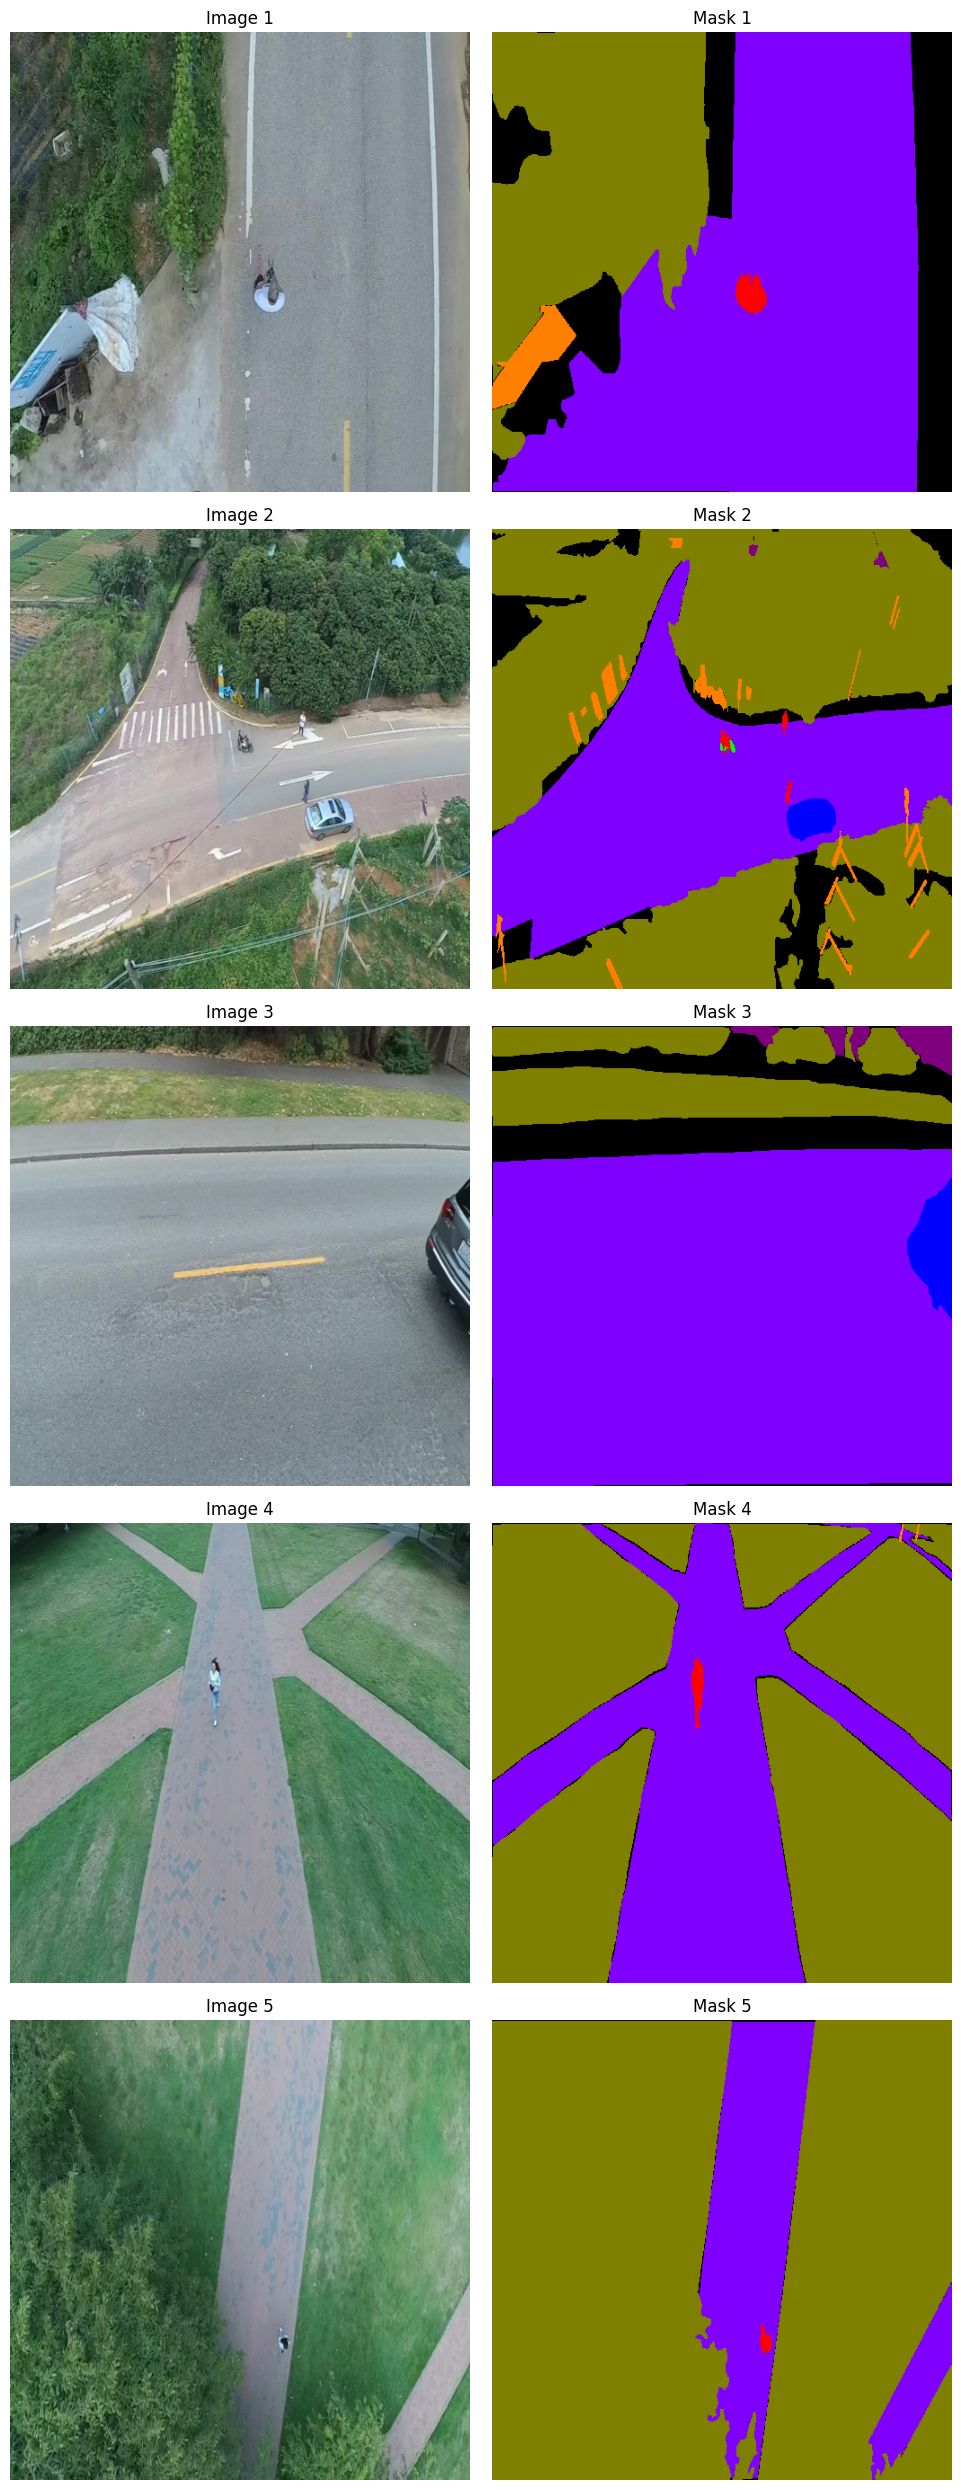

In [10]:
visualize_samples(train_dataset)

# **<font style="color:green">3. Evaluation Metrics </font>**

<p>This competition is evaluated on the mean <a href='https://en.wikipedia.org/wiki/Sørensen–Dice_coefficient'>Dice coefficient</a
>. The Dice coefficient can be used to compare the pixel-wise agreement between a predicted segmentation and its corresponding ground truth. The formula is given by: </p>

<p>$$DSC =  \frac{2 |X \cap Y|}{|X|+ |Y|}$$
$$ \small \mathrm{where}\ X = Predicted\ Set\ of\ Pixels,\ \ Y = Ground\ Truth $$ </p>
<p>The Dice coefficient is defined to be 1 when both X and Y are empty.</p>

**In this section, you have to implement the dice coefficient evaluation metric.**

## ***<font style="color:purple">3.1. Definition function Dice Coefficient</font>***

In [11]:
def dice_coefficient(pred, target, num_classes=NUM_CLASSES):
    """ Calculate the Dice coefficient for multi-class segmentation.

    Args:
        pred (_type_): _prediction logits_
        target (_type_): _ground truth labels_
        num_classes (_type_, optional): _number of classes_. Defaults to NUM_CLASSES.

    Returns:
        _type_: _mean dice score, list of dice scores per class_
    """ 
    pred = pred.argmax(dim=1).flatten()  # Prediction from logits
    target = target.flatten()
    dice_scores = []
    for cls in range(num_classes):
        pred_cls = (pred == cls).float()
        target_cls = (target == cls).float()
        intersection = (pred_cls * target_cls).sum()
        dice = (2. * intersection + 1e-6) / (pred_cls.sum() + target_cls.sum() + 1e-6)
        dice_scores.append(dice.item())
    return np.mean(dice_scores), dice_scores

## ***<font style="color:purple">3.2. Definition class of Dice Loss</font>***

In [12]:
class DiceLoss(nn.Module):
    """ Dice Loss for multi-class segmentation.

    Args:
        nn (_type_): Base class for all neural network modules in PyTorch.
    """
    def __init__(self):
        """ Initialize the DiceLoss class.
        """
        super(DiceLoss, self).__init__()
    
    def forward(self, preds, targets):
        """ Compute the Dice Loss.

        Args:
            preds (_type_): _predicted probabilities from the model_.
            targets (_type_): _ground truth labels_.

        Returns:
            _type_: _computed Dice Loss value_.
        """
        print(f"Preds shape: {preds.shape}, Targets shape: {targets.shape}")
        preds = torch.softmax(preds, dim=1)
        num_classes = preds.shape[1]
        one_hot = torch.nn.functional.one_hot(targets, num_classes=num_classes)
        one_hot = one_hot.permute(0, 3, 1, 2).float()
        print(f"One-hot shape: {one_hot.shape}")
        smooth = 1e-6
        inter = (preds * one_hot).sum(dim=(2, 3))
        union = preds.sum(dim=(2, 3)) + one_hot.sum(dim=(2, 3))
        dice = (2. * inter + smooth) / (union + smooth)
        return 1 - dice.mean()

# **<font style="color:green">4. Model</font>**

**In this section, you have to define your model.**

## ***<font style="color:purple">4.1. Definition of class Channel Attention</font>***

In [13]:
class ChannelAttention(nn.Module):
    """ Channel Attention Module

    Args:
        nn (_type_): _nn.Module_
    """
    def __init__(self, in_channels, ratio=16):
        """ Initialize Channel Attention Module

        Args:
            in_channels (_type_): Number of input channels
            ratio (int, optional): Reduction ratio. Defaults to 16.
        """
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(in_channels, in_channels // ratio),
            nn.ReLU(),
            nn.Linear(in_channels // ratio, in_channels),
            nn.Sigmoid()
        )

    def forward(self, x):
        """ Forward pass of Channel Attention Module

        Args:
            x (_type_): Input feature map

        Returns:
            _type_: Output feature map after applying channel attention
        """
        b, c, _, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

## ***<font style="color:purple">4.2. Definition class of SegNet model</font>***

In [14]:
class CustomSegNet(nn.Module):
    """ Custom SegNet model with attention mechanism.

    Args:
        nn (_type_): PyTorch neural network module
    """
    def __init__(self, encoder_json='encoder.json', decoder_json='decoder.json', num_classes=NUM_CLASSES):
        """ Initialize the CustomSegNet model.

        Args:
            encoder_json (str, optional): Paths to JSON configuration files for encoder. Defaults to 'encoder.json'.
            decoder_json (str, optional): Paths to JSON configuration files for decoder. Defaults to 'encoder.json' and 'decoder.json'.
            num_classes (_type_, optional): Number of output classes. Defaults to NUM_CLASSES.

        Raises:
            ValueError: If no convolutional layer is found in encoder configuration.
        """
        super().__init__()
        with open(encoder_json, 'r') as f:
            encoder_cfg = json.load(f)
        with open(decoder_json, 'r') as f:
            decoder_cfg = json.load(f)
        
        encoder_layers = []
        in_channels = 3
        for layer in encoder_cfg['layers']:
            if layer['type'] == 'conv':
                kernel_size = layer.get('kernel_size', 3)
                padding = (kernel_size - 1) // 2
                encoder_layers.append(nn.Conv2d(in_channels, layer['filters'], kernel_size=kernel_size, padding=padding))
                encoder_layers.append(nn.ReLU())
                in_channels = layer['filters']
            elif layer['type'] == 'pool':
                encoder_layers.append(nn.MaxPool2d(2, 2, return_indices=True))
            elif layer['type'] == 'attention':
                encoder_layers.append(ChannelAttention(in_channels))
            elif layer['type'] == 'dropout':
                encoder_layers.append(nn.Dropout(layer['rate']))
        self.encoder = nn.Sequential(*encoder_layers)
        
        decoder_layers = []
        last_conv_filters = None
        for layer in reversed(encoder_cfg['layers']):
            if layer['type'] == 'conv':
                last_conv_filters = layer['filters']
                break
        if last_conv_filters is None:
            raise ValueError("No convolutional layer found in encoder configuration")
        in_channels = last_conv_filters
        
        for layer in decoder_cfg['layers']:
            if layer['type'] == 'unpool':
                decoder_layers.append(nn.MaxUnpool2d(2, 2))
            elif layer['type'] == 'conv':
                kernel_size = layer.get('kernel_size', 3)
                padding = (kernel_size - 1) // 2
                decoder_layers.append(nn.Conv2d(in_channels, layer['filters'], kernel_size=kernel_size, padding=padding))
                decoder_layers.append(nn.ReLU())
                in_channels = layer['filters']
            elif layer['type'] == 'atrous':
                decoder_layers.append(nn.Conv2d(in_channels, layer['filters'], kernel_size=3, padding=layer['dilation'], dilation=layer['dilation']))
                decoder_layers.append(nn.ReLU())
                in_channels = layer['filters']
            elif layer['type'] == 'dropout':
                decoder_layers.append(nn.Dropout(layer['rate']))
        # Ensure final output matches NUM_CLASSES
        decoder_layers.append(nn.Conv2d(in_channels, num_classes, kernel_size=1))
        self.decoder = nn.Sequential(*decoder_layers)

    def forward(self, x):
        """ Forward pass through the CustomSegNet model.

        Args:
            x (_type_): Input tensor

        Returns:
            _type_: Output tensor
        """
        indices, sizes = [], []
        for layer in self.encoder:
            if isinstance(layer, nn.MaxPool2d):
                sizes.append(x.size())
                x, idx = layer(x)
                indices.append(idx)
            else:
                x = layer(x)
        
        for layer in self.decoder:
            if isinstance(layer, nn.MaxUnpool2d):
                x = layer(x, indices.pop(), output_size=sizes.pop())
            else:
                x = layer(x)
        return x

# **<font style="color:green">5. Optimalization / Final Train</font>**

## ***<font style="color:purple">5.1. Optuna optimalization</font>***

### *<font style="color:brown">5.1.1 Function of Optuna optimalization definition</font>*

In [15]:
def objective(trial):
    """ Objective function for Optuna hyperparameter optimization.

    Args:
        trial (_type_): An Optuna trial object.

    Raises:
        optuna.TrialPruned: If the trial is pruned based on intermediate results.

    Returns:
        _type_: Best validation loss achieved during training.
    """
    lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    batch_size = trial.suggest_categorical("batch_size", [4, 8, 16, 32])
    dropout_rate = trial.suggest_float("dropout_rate", 0.0, 0.5)
    num_encoder_layers = trial.suggest_int("num_encoder_layers", 2, 5)
    base_filters = trial.suggest_categorical("base_filters", [16, 32, 64])
    use_attention = trial.suggest_categorical("use_attention", [True, False])
    use_atrous = trial.suggest_categorical("use_atrous", [True, False])

    encoder_cfg = {'layers': []}
    in_channels = 3
    current_filters = base_filters
    pool_count = 0
    channel_counts = []
    for i in range(num_encoder_layers):
        kernel_size = trial.suggest_categorical(f"encoder_kernel_size_{i}", [3, 5])
        encoder_cfg['layers'].append({'type': 'conv', 'filters': current_filters, 'kernel_size': kernel_size})
        if use_attention:
            encoder_cfg['layers'].append({'type': 'attention', 'channels': current_filters})
        encoder_cfg['layers'].append({'type': 'pool'})
        channel_counts.append(current_filters)
        pool_count += 1
        encoder_cfg['layers'].append({'type': 'dropout', 'rate': dropout_rate})
        if i < num_encoder_layers - 1:
            current_filters *= 2
        in_channels = current_filters

    decoder_cfg = {'layers': []}
    decoder_channels = channel_counts[::-1]  # Reverse to go from deep to shallow
    for i in range(pool_count):
        decoder_cfg['layers'].append({'type': 'unpool'})
        kernel_size = trial.suggest_categorical(f"decoder_kernel_size_{i}", [3, 5])
        if i < pool_count - 1:
            next_filters = decoder_channels[i + 1]
            decoder_cfg['layers'].append({'type': 'conv', 'filters': next_filters, 'kernel_size': kernel_size})
            if use_atrous:
                dilation = trial.suggest_int(f"dilation_{i}", 2, 4)
                decoder_cfg['layers'].append({'type': 'atrous', 'filters': next_filters, 'dilation': dilation})
        else:
            decoder_cfg['layers'].append({'type': 'conv', 'filters': NUM_CLASSES, 'kernel_size': kernel_size})
        decoder_cfg['layers'].append({'type': 'dropout', 'rate': dropout_rate})

    print(f"Trial {trial.number}: Encoder Config: {encoder_cfg}")
    print(f"Trial {trial.number}: Decoder Config: {decoder_cfg}")
    print(f"Trial {trial.number}: Channel counts before pools: {channel_counts}")

    with open('encoder.json', 'w') as f:
        json.dump(encoder_cfg, f)
    with open('decoder.json', 'w') as f:
        json.dump(decoder_cfg, f)

    model = CustomSegNet().to(DEVICE)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = DiceLoss()
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    best_val_loss = float('inf')
    patience = PATIENCE_OPTIMALIZATION
    best_epoch = 0
    for epoch in range(NUM_EPOCH_OPTIMALIZATION):
        train_loss = train_epoch(model, train_loader, optimizer, criterion)
        val_loss, miou, ious = validate_epoch(model, val_loader, criterion)
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_epoch = epoch
        trial.report(val_loss, epoch)
        if trial.should_prune() or (epoch - best_epoch >= patience):
            raise optuna.TrialPruned()
    return best_val_loss

## ***<font style="color:purple">5.2. Final Train</font>***

### *<font style="color:brown">5.2.1 Function of train epoch</font>*

In [16]:
def train_epoch(model, train_loader, optimizer, criterion, scheduler=None):
    """ Train the model for one epoch.

    Args:
        model (_type_): _model to be trained_
        train_loader (_type_): _data loader for training data_
        optimizer (_type_): _optimizer for updating model weights_
        criterion (_type_): _loss function_
        scheduler (_type_, optional): _scheduler for learning rate adjustment. Defaults to None.

    Returns:
        _type_: _average loss for the epoch_
    """
    model.train()
    total_loss = 0.0
    num_batches = len(train_loader)
    
    for batch_idx, (images, masks) in enumerate(train_loader):
        images, masks = images.to(DEVICE), masks.to(DEVICE)
        optimizer.zero_grad()
        outputs = model(images)
        print(f"Output shape: {outputs.shape}, Mask shape: {masks.shape}")
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        if batch_idx % 10 == 0:
            print(f"Batch {batch_idx}/{num_batches} - Loss: {loss.item():.4f}")
    
    avg_loss = total_loss / num_batches
    if scheduler is not None:
        scheduler.step()
    return avg_loss

### *<font style="color:brown">5.2.2 Function of validation epoch</font>*

In [17]:
def validate_epoch(model, val_loader, criterion, num_classes=NUM_CLASSES):
    """ Validate the model for one epoch.

    Args:
        model (_type_): model to validate
        val_loader (_type_): validation data loader
        criterion (_type_): loss function
        num_classes (_type_, optional): number of classes. Defaults to NUM_CLASSES.

    Returns:
        _type_: average loss, average mIoU, list of class-wise IoUs
    """
    model.eval()
    total_loss = 0.0
    total_miou = 0.0
    class_ious = [0.0] * num_classes
    with torch.no_grad():
        for images, masks in val_loader:
            images, masks = images.to(DEVICE), masks.to(DEVICE)
            outputs = model(images)
            loss = criterion(outputs, masks)
            total_loss += loss.item()
            preds = outputs.argmax(dim=1)
            for c in range(num_classes):
                iou = (torch.sum((preds == c) & (masks == c)).float() + 1e-6) / (torch.sum((preds == c) | (masks == c)).float() + 1e-6)
                class_ious[c] += iou.item()
            total_miou += torchmetrics.functional.jaccard_index(preds, masks, task="multiclass", num_classes=num_classes).item()
    return total_loss / len(val_loader), total_miou / len(val_loader), [iou / len(val_loader) for iou in class_ious]

### *<font style="color:brown">5.2.3 Function of training process</font>*

In [18]:
def train_full_model(encoder_cfg, decoder_cfg, train_dataset, val_dataset, lr=0.001, batch_size=4,
                     num_classes=NUM_CLASSES, num_epochs=30, device='cuda', final_train=False, pretrained_path=None):
    """ Train the full segmentation model with given configurations and datasets.

    Args:
        encoder_cfg (_type_): encoder configuration dictionary
        decoder_cfg (_type_): decoder configuration dictionary
        train_dataset (_type_): training dataset
        val_dataset (_type_): validation dataset
        lr (float, optional): _learning rate. Defaults to 0.001.
        batch_size (int, optional): _batch size. Defaults to 4.
        num_classes (_type_, optional): _number of classes. Defaults to NUM_CLASSES.
        num_epochs (int, optional): _number of epochs. Defaults to 30.
        device (str, optional): device to use. Defaults to 'cuda'.
        final_train (bool, optional): flag for final training. Defaults to False.
        pretrained_path (_type_, optional): pretrained model path. Defaults to None.

    Raises:
        ValueError: value error if configurations or datasets are not provided
        ValueError: value error if configurations or datasets are not provided

    Returns:
        _type_: training and validation losses, mean IoUs, class IoUs
    """
    if encoder_cfg is None or decoder_cfg is None:
        raise ValueError("encoder_cfg and decoder_cfg must be specified.")
    if train_dataset is None or val_dataset is None:
        raise ValueError("train_dataset and val_dataset must be specified.")

    DEVICE = torch.device(device if torch.cuda.is_available() else 'cpu')

    with open('encoder.json', 'w') as f:
        json.dump(encoder_cfg, f)
    with open('decoder.json', 'w') as f:
        json.dump(decoder_cfg, f)

    model = CustomSegNet().to(DEVICE)
    
    if pretrained_path is not None:
        if os.path.exists(pretrained_path):
            model.load_state_dict(torch.load(pretrained_path, map_location=DEVICE))
            print(f"Pretrained model loaded from: {pretrained_path}")
        else:
            warnings.warn(f"Pretrained path {pretrained_path} does not exist. Starting from scratch.")

    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = DiceLoss()
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    writer = SummaryWriter("./runs/final_train" if final_train else "./runs/experiment")
    train_losses, val_losses, mean_ious, class_ious = [], [], [], [[] for _ in range(num_classes)]

    for epoch in range(num_epochs):
        train_loss = train_epoch(model, train_loader, optimizer, criterion, scheduler)
        train_losses.append(train_loss)
        val_loss, miou, ious = validate_epoch(model, val_loader, criterion)
        val_losses.append(val_loss)
        mean_ious.append(miou)
        for c in range(num_classes):
            class_ious[c].append(ious[c])

        writer.add_scalar('Loss/train', train_loss, epoch)
        writer.add_scalar('Loss/val', val_loss, epoch)
        writer.add_scalar('Metrics/MeanIoU', miou, epoch)
        for c in range(num_classes):
            writer.add_scalar(f'Metrics/ClassIoU_{c}', ious[c], epoch)

        checkpoint_dir = './checkpoints/final' if final_train else './checkpoints/experiment'
        os.makedirs(checkpoint_dir, exist_ok=True)
        checkpoint_path = f"{checkpoint_dir}/model_epoch_{epoch}.pth"
        torch.save(model.state_dict(), checkpoint_path)
        print(f"Checkpoint saved: {checkpoint_path}")

        if not val_losses or val_loss <= min(val_losses):
            best_model_path = f"{checkpoint_dir}/best_model.pth"
            torch.save(model.state_dict(), best_model_path)
            print(f"Best model saved: {best_model_path}")

        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Mean IoU: {miou:.4f}")

    writer.close()
    return train_losses, val_losses, mean_ious, class_ious

## ***<font style="color:purple">5.3. Run Optimalization/Final Train</font>***

### *<font style="color:brown">5.3.1 Definition Main funciton</font>*

In [19]:
def main(mode='optimize', n_trials=10, num_epochs=30, train_dataset=None, val_dataset=None,
         encoder_cfg=None, decoder_cfg=None, lr=None, batch_size=None, pretrained_path=None):
    """ Main function to either optimize hyperparameters or perform final training.

    Args:
        mode (str, optional): 'optimize' for hyperparameter tuning, 'train' for final training. Defaults to 'optimize'.
        n_trials (int, optional): Number of trials for hyperparameter optimization. Defaults to 10.
        num_epochs (int, optional): Number of epochs for training. Defaults to 30.
        train_dataset (_type_, optional): training dataset. Defaults to None.
        val_dataset (_type_, optional): validation dataset. Defaults to None.
        encoder_cfg (_type_, optional): encoder configuration. Defaults to None.
        decoder_cfg (_type_, optional): decoder configuration. Defaults to None.
        lr (_type_, optional): learning rate. Defaults to None.
        batch_size (_type_, optional): batch size. Defaults to None.
        pretrained_path (_type_, optional): path to pretrained model. Defaults to None.

    Raises:
        ValueError: error if required parameters are missing for the selected mode.
        ValueError: error if mode is invalid.

    Returns:
        _type_: If mode is 'optimize', returns None. If mode is 'train', returns training and validation losses, mean IoUs, and class IoUs.
    """
    DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    if mode == 'optimize':
        print("Running optimization with Optuna...")
        study = optuna.create_study(direction="minimize")
        study.optimize(lambda trial: objective(trial), n_trials=n_trials)
        print("Optimization complete. View the results in TensorBoard and Optuna dashboard.")
        return
    elif mode == 'train':
        print("Final training begins...")
        if train_dataset is None or val_dataset is None:
            raise ValueError("train_dataset and val_dataset are needed for final training.")
        if encoder_cfg is None or decoder_cfg is None:
            raise ValueError("For final training, encoder_cfg and decoder_cfg must be specified.")
        
        lr = lr if lr is not None else 0.001
        batch_size = batch_size if batch_size is not None else 4
        
        train_losses, val_losses, mean_ious, class_ious = train_full_model(
            encoder_cfg=encoder_cfg,
            decoder_cfg=decoder_cfg,
            train_dataset=train_dataset,
            val_dataset=val_dataset,
            lr=lr,
            batch_size=batch_size,
            num_epochs=num_epochs,
            final_train=True,
            pretrained_path=pretrained_path
        )
        print("Final training completed. Metrics saved.")
        return train_losses, val_losses, mean_ious, class_ious
    else:
        raise ValueError("Invalid mode. Use 'optimize' or 'train'.")

### *<font style="color:brown">5.3.2 Hyperparameters setting for Optuna optimalization and Final Train</font>*

In [20]:
TASK = "optimize"
NUM_EPOCH_OPTIMALIZATION = 10
PATIENCE_OPTIMALIZATION = 3
NUMBER_OF_TRIALS = 5
NUM_EPOCH_FINAL_TRAIN = 100
BATCH_SIZE = 32
LEARNING_RATE = 0.0005

### *<font style="color:brown">5.3.3 Implementation Main function</font>*

In [ ]:
if __name__ == "__main__":
    if TASK == "optimize":
        main(mode=TASK, n_trials=NUMBER_OF_TRIALS, num_epochs=NUM_EPOCH_OPTIMALIZATION, train_dataset=train_dataset, val_dataset=val_dataset)
    elif TASK == "train":
        custom_encoder_cfg = {
            'layers': [
                {'type': 'conv', 'filters': 32, 'kernel_size': 3},
                {'type': 'attention', 'channels': 32},
                {'type': 'pool'},
                {'type': 'dropout', 'rate': 0.0},
                {'type': 'conv', 'filters': 64, 'kernel_size': 3},
                {'type': 'pool'},
                {'type': 'dropout', 'rate': 0.0}
            ]
        }
        custom_decoder_cfg = {
            'layers': [
                {'type': 'unpool'},
                {'type': 'conv', 'filters': 32, 'kernel_size': 3},
                {'type': 'dropout', 'rate': 0.0},
                {'type': 'unpool'},
                {'type': 'conv', 'filters': NUM_CLASSES, 'kernel_size': 3},
                {'type': 'dropout', 'rate': 0.0}
            ]
        }
        
        train_losses, val_losses, mean_ious, class_ious = main(
            mode=TASK,
            num_epochs=NUM_EPOCH_FINAL_TRAIN,
            train_dataset=train_dataset,
            val_dataset=val_dataset,
            encoder_cfg=custom_encoder_cfg,
            decoder_cfg=custom_decoder_cfg,
            lr=LEARNING_RATE,
            batch_size=BATCH_SIZE,
            pretrained_path=None
        )
        
        best_model_path = './checkpoints/final/best_model.pth'
        model = CustomSegNet().to(DEVICE)
        model.load_state_dict(torch.load(best_model_path, map_location=DEVICE))
        model.eval()

        dummy_input = torch.randn(1, 3, 512, 512).to(DEVICE)
        torch.onnx.export(model, dummy_input, "model.onnx", export_params=True, opset_version=11, 
                          do_constant_folding=True, input_names=['input'], output_names=['output'],
                          dynamic_axes={'input': {0: 'batch_size'}, 'output': {0: 'batch_size'}})
        print("Model exported to ONNX format: model.onnx")
    else:
        raise ValueError("Invalid mode. Use 'optimize' or 'train'.")

[I 2025-08-29 13:14:12,567] A new study created in memory with name: no-name-ea715b31-b7e6-4184-ac19-c2a4f037f418


Running optimization with Optuna...
Trial 0: Encoder Config: {'layers': [{'type': 'conv', 'filters': 16, 'kernel_size': 3}, {'type': 'pool'}, {'type': 'dropout', 'rate': 0.17213774298353735}, {'type': 'conv', 'filters': 32, 'kernel_size': 3}, {'type': 'pool'}, {'type': 'dropout', 'rate': 0.17213774298353735}, {'type': 'conv', 'filters': 64, 'kernel_size': 3}, {'type': 'pool'}, {'type': 'dropout', 'rate': 0.17213774298353735}, {'type': 'conv', 'filters': 128, 'kernel_size': 3}, {'type': 'pool'}, {'type': 'dropout', 'rate': 0.17213774298353735}, {'type': 'conv', 'filters': 256, 'kernel_size': 5}, {'type': 'pool'}, {'type': 'dropout', 'rate': 0.17213774298353735}]}
Trial 0: Decoder Config: {'layers': [{'type': 'unpool'}, {'type': 'conv', 'filters': 128, 'kernel_size': 5}, {'type': 'atrous', 'filters': 128, 'dilation': 2}, {'type': 'dropout', 'rate': 0.17213774298353735}, {'type': 'unpool'}, {'type': 'conv', 'filters': 64, 'kernel_size': 3}, {'type': 'atrous', 'filters': 64, 'dilation': 3}

# **<font style="color:green">6. Inference</font>**


## ***<font style="color:purple">6.1. Definition of function visualize inference</font>***

In [ ]:
def visualize_inference(model, dataset, num_samples=5, device='cuda'):
    """ Visualizes model predictions on a few samples from the dataset.

    Args:
        model (_type_): _trained PyTorch model_
        dataset (_type_): _dataset to sample from_
        num_samples (int, optional): _number of samples to visualize_. Defaults to 5.
        device (str, optional): device to run the model on. Defaults to 'cuda'.
    """
    model.eval()
    colors = [
        [0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1],
        [0, 1, 1], [1, 0.5, 0], [0.5, 0, 0.5], [0.5, 0.5, 0], [0.5, 0, 1], [0, 0.5, 0.5]
    ]
    
    fig, axes = plt.subplots(num_samples, 3, figsize=(15, num_samples * 5))
    with torch.no_grad():
        for i in range(num_samples):
            img, gt_mask = dataset[i]
            img = img.unsqueeze(0).to(device)
            pred = model(img).argmax(dim=1).squeeze(0).cpu().numpy()
            
            img_np = img.squeeze(0).permute(1, 2, 0).cpu().numpy() * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
            img_np = np.clip(img_np, 0, 1)
            
            gt_mask_np = gt_mask.numpy()
            colored_gt = np.zeros((512, 512, 3))
            for cls in range(NUM_CLASSES):
                colored_gt[gt_mask_np == cls] = colors[cls]
            
            colored_pred = np.zeros((512, 512, 3))
            for cls in range(NUM_CLASSES):
                colored_pred[pred == cls] = colors[cls]
            
            axes[i, 0].imshow(img_np)
            axes[i, 0].set_title(f"Image {i+1}")
            axes[i, 0].axis('off')
            
            axes[i, 1].imshow(colored_gt)
            axes[i, 1].set_title(f"GT Mask {i+1}")
            axes[i, 1].axis('off')
            
            axes[i, 2].imshow(colored_pred)
            axes[i, 2].set_title(f"Pred Mask {i+1}")
            axes[i, 2].axis('off')
    
    plt.tight_layout()
    plt.show()

## ***<font style="color:purple">6.2. Show inference</font>***

In [ ]:
if TASK == "train":
    visualize_inference(model, val_dataset, num_samples=5, device=DEVICE)

# **<font style="color:green">7. Prepare Submission CSV</font>**

## ***<font style="color:purple">7.1. Define function RLE encode</font>***

In [ ]:
def rle_encode(mask):
    """ Run-length encoding for binary mask.

    Args:
        mask (_type_): _binary mask_

    Returns:
        _type_: _rle string_
    """
    pixels = mask.T.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs) if np.any(mask) else ''

## ***<font style="color:purple">7.2. Define function of submission</font>***

In [ ]:
def prepare_submission(model, test_dataset, output_csv='submission.csv', device='cuda'):
    """ Prepare submission file for the test dataset.

    Args:
        model (_type_): _trained model_.
        test_dataset (_type_): _test dataset_.
        output_csv (str, optional): output csv file name. Defaults to 'submission.csv'.
        device (str, optional): _device to run the model on_. Defaults to 'cuda'.
    """ 
    model.eval()
    submissions = []
    with torch.no_grad():
        for idx in range(len(test_dataset)):
            img, _ = test_dataset[idx]
            img_id = test_dataset.image_ids[idx]
            img = img.unsqueeze(0).to(device)
            pred = model(img).argmax(dim=1).squeeze(0).cpu().numpy()
            
            for cls in range(1, NUM_CLASSES):
                class_mask = (pred == cls).astype(np.uint8)
                encoded = rle_encode(class_mask)
                if encoded:
                    submissions.append([f"{str(img_id)}_{cls}", encoded])
    
    df = pd.DataFrame(submissions, columns=['ImageId_ClassId', 'EncodedPixels'])
    df.to_csv(output_csv, index=False)
    print(f"Submission CSV saved: {output_csv}")

## ***<font style="color:purple">7.3. Save submission</font>***

In [ ]:
if TASK == "train":
    prepare_submission(model, test_dataset, output_csv='submission.csv', device=DEVICE)

# **<font style="color:green">8. Kaggle Profile Link</font>**

Share your Kaggle profile link here with us so that we can give points for the competition score. 

You should have a minimum IoU of `0.60` on the test data to get all points. If the IoU is less than `0.55`, you will not get any points for the section. 

**You must have to submit `submission.csv` (prediction for images in `test.csv`) in `Submit Predictions` tab in Kaggle to get any evaluation in this section.**